In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from pandas.api.types import is_numeric_dtype
from sklearn.decomposition import PCA
import sklearn.preprocessing as pre

In [38]:

def convert_birth_order_style_to_discrete(x):
    switcher = {
        'NA' : float('NaN'),
        'A': float(0),
        'B': float(1),
    }
    return switcher[x]
def convert_sex_style_to_discrete(x):
    switcher = {
        'NA' : float('NaN'),
        'Male': float(0),
        'Female': float(1),
    }
    return switcher[x]
def convert_bool_style_to_discrete(x):
    switcher = {
        'NA' : float('NaN'),
        'No': float(0),
        'Yes': float(1),
    }
    return switcher[x.lstrip()[:3].rstrip()]
def convert_alon_wend_style_to_discrete(x):
    switcher = {
        'NA' : float('NaN'),
        'Not at all':float(0),
        'Less than 1 hour':float(1),
        '1-2 hours':float(2),
        '3 or more hours':float(3)
    }
    return switcher[x]
def convert_draw_wend_style_to_discrete(x):
    switcher = {
        'NA' : float('NaN'),
        'Not at all':float(0),
        'Less than 1 hour':float(1),
        '1 or more hours':float(2),
    }
    return switcher[x]
def convert_creat_14_style_to_discrete(x):
    switcher = {
        'NA' : float('NaN'),
        'Not at all':float(0),
        'sometimes':float(1),
        'often':float(2),
        'always':float(3)
    }
    return switcher[x]  
def convert_exercise_style_to_discrete(x):#correction, dict says 'per' but is 'a'
    switcher = {
        'NA' : float('NaN'),
        'Never':float(0),
        'Less than once a month':float(1),
        '1-3 times a month':float(2),
        '1-4 times a week':float(3),
        '5 or more times a week':float(4)
    }
    return switcher[x]  
def convert_fam_tv_aft_style_to_discrete(x):
    switcher = {
        'NA' : float('NaN'),
        "Don't have a T.V.":float(0),
        'Other':float(0.5),#Data merges dont have + hardly ever
        'No hardly ever':float(1),
        'Yes, Some Days':float(2),
        'Yes, Every Day':float(2),
    }
    return switcher[x]  
def convert_musi_wend_style_to_discrete(x):
    switcher = {
        'NA' : float('NaN'),
        "Not at all":float(0),
        'Any at all':float(1),
    }
    return switcher[x]  
def convert_out_sum_style_to_discrete(x):
    switcher = {
        'NA' : float('NaN'),
        "Less than 3 hours":float(0),
        '3 or more hours':float(1),
    }
    return switcher[x] 
def convert_out_win_style_to_discrete(x):
    switcher = {
        'NA' : float('NaN'),
        "Less than 3 hours":float(0),
        '3 or more hours':float(1),
    }
    return switcher[x]  
def convert_phone_14_style_to_discrete(x):
    switcher = {
        'NA' : float('NaN'),
        'Not at all':float(0),
        '< 1 hour':float(1),
        '1 or more hours':float(2),
    }
    return switcher[x]  
def convert_depband_style_to_discrete(x):
    switcher = {
        'NA' : float('NaN'),
        '<0.1%':float(0),
        '~0.5%':float(1),
        '~3%':float(2),
        '~15%':float(3),
        
        '~50%':float(4),
        '>70%':float(5),     
    }
    return switcher[x]  
def convert_num_home_style_to_discrete(x):
    if (x == 'NA'):
        return float('NaN')
    if (x == '9 or more'):
        return float(9)
    return float(x)
def convert_mat_age_style_to_discrete(x):
    if (x == 'NA'):
        return float('NaN')
    if (x == '< 16'):
        return float(15)
    if (x == '>43'):
        return float(44)
    return float(x)
def convert_education_style_to_discrete(x):
    switcher = {
        'NA' : float('NaN'),
        'CSE/None':float(0),
        'cse':float(0),
        'Vocational':float(1),
        'O level':float(2),
        'A level':float(3),
        'Degree':float(4),     
    }
    return switcher[x] 
def convert_social_class_style_to_discrete(x):
    switcher = {
        'NA' : float('NaN'),
        'i':float(1),
        'ii':float(2),
        'Armed forces':float(3),
        'III (manual)':float(3),
        'III (non-manual)':float(3),
        'iv':float(4),
        'v':float(5),
    }
    return switcher[x]  

birth_order_style_converter = lambda x : float(convert_birth_order_style_to_discrete(x))
sex_style_converter = lambda x : float(convert_sex_style_to_discrete(x))
boolean_style_converter = lambda x : float(convert_bool_style_to_discrete(x))
social_class_style_converter =  lambda x : float(convert_social_class_style_to_discrete(x))
num_home_style_converter =  lambda x : float(convert_num_home_style_to_discrete(x))
convert_phone_style_converter = lambda x : float(convert_phone_14_style_to_discrete(x))
out_sum_style_converter = lambda x : float(convert_out_sum_style_to_discrete(x))
fam_tv_aft_style_convert = lambda x : float(convert_fam_tv_aft_style_to_discrete(x))
draw_wend_style_converter = lambda x : float(convert_draw_wend_style_to_discrete(x))
creat_14_style_converter = lambda x : float(convert_creat_14_style_to_discrete(x))
alon_wend_style_converter = lambda x : float(convert_alon_wend_style_to_discrete(x))
depband_style_converter = lambda x : float(convert_depband_style_to_discrete(x))
mat_age_style_converter =  lambda x : float(convert_mat_age_style_to_discrete(x))
edu_style_converter = lambda x : float(convert_education_style_to_discrete(x))
converters = {
    'alon_wend' : alon_wend_style_converter,
    'alon_week' : alon_wend_style_converter,
    'comp_week' : alon_wend_style_converter,
    'comp_wend' : alon_wend_style_converter,
    'creat_14'  : creat_14_style_converter,
    'draw_wend' : draw_wend_style_converter,
    'draw_week' : draw_wend_style_converter,
    'exercise'  : convert_exercise_style_to_discrete,
    'fam_tv_aft': fam_tv_aft_style_convert,
    'fam_tv_eve': fam_tv_aft_style_convert,
    'fam_tv_mor': fam_tv_aft_style_convert,
    'musi_week' : convert_musi_wend_style_to_discrete,
    'musi_wend' : convert_musi_wend_style_to_discrete,
    'out_sum_week' : out_sum_style_converter,
    'out_sum_wend' : out_sum_style_converter,
    'out_win_week' : alon_wend_style_converter,
    'out_win_wend' : alon_wend_style_converter,
    'phone_14_week' : convert_phone_style_converter,
    'phone_14_wend' : convert_phone_style_converter,
    'play_week' : convert_out_sum_style_to_discrete,
    'play_wend' : convert_out_sum_style_to_discrete,
    'read_week' : convert_draw_wend_style_to_discrete,
    'read_wend' : convert_draw_wend_style_to_discrete,
    'talk_mob_week' : convert_draw_wend_style_to_discrete,
    'talk_mob_wend' : convert_draw_wend_style_to_discrete,
    'talk_phon_week' : convert_musi_wend_style_to_discrete,
    'talk_phon_wend' : convert_musi_wend_style_to_discrete,
    'text_week' : convert_alon_wend_style_to_discrete,
    'text_wend' : convert_alon_wend_style_to_discrete,
    'tran_week' : convert_draw_wend_style_to_discrete,
    'tran_wend' : convert_draw_wend_style_to_discrete,
    'tv_week' : alon_wend_style_converter,
    'tv_wend' : alon_wend_style_converter,
    'work_week' : convert_alon_wend_style_to_discrete,
    'work_wend' : convert_alon_wend_style_to_discrete,
    'dep_band_07' : depband_style_converter,
    'dep_band_10' : depband_style_converter,
    'dep_band_13' : depband_style_converter,
    'dep_band_15' : depband_style_converter,
    'anx_band_07' : depband_style_converter,
    'anx_band_10' : depband_style_converter,
    'anx_band_13' : depband_style_converter,
    'anx_band_15' : depband_style_converter,
    'mat_age' : convert_mat_age_style_to_discrete,
    'num_home': num_home_style_converter,
    'mat_edu':edu_style_converter,
    'pat_edu':edu_style_converter,
    'mat_ses':social_class_style_converter,
    'pat_ses':social_class_style_converter,
    'child_bull' : boolean_style_converter,
    'comp_bed_9' : boolean_style_converter,
    'comp_games' : boolean_style_converter,
    'musi_13' : boolean_style_converter,
    'own_mob' : boolean_style_converter,
    'pat_pres' : boolean_style_converter,
    'pat_pres_10' : boolean_style_converter,
    'pat_pres_8' : boolean_style_converter,
    'tv_bed_9' : boolean_style_converter,
    'mat_anx_1' : boolean_style_converter,
    'mat_anx_0m': boolean_style_converter,
    'mat_anx_8m' : boolean_style_converter,
    'mat_anx_18m' : boolean_style_converter,
    'comp_noint_bed_16' : boolean_style_converter,
    'comp_int_bed_16' : boolean_style_converter,
    'emot_cruel' : boolean_style_converter,
    'phys_cruel': boolean_style_converter,
    'tv_bed_16' : boolean_style_converter,
    'comp_house': boolean_style_converter,
    'has_dep_diag': boolean_style_converter,
    'birth_order': birth_order_style_converter,
    'sex': sex_style_converter,
 
 
}


In [59]:
synth_data = 'data/maps-synthetic-data-v1.1.csv'
synth_description = 'data/synthetic_data_dictionary.csv'
data_frame = pd.read_csv(synth_data,index_col=0,converters = converters)
description_frame = pd.read_csv(synth_description)
del data_frame['flag']
len(data_frame.columns)

83

(83, 83)


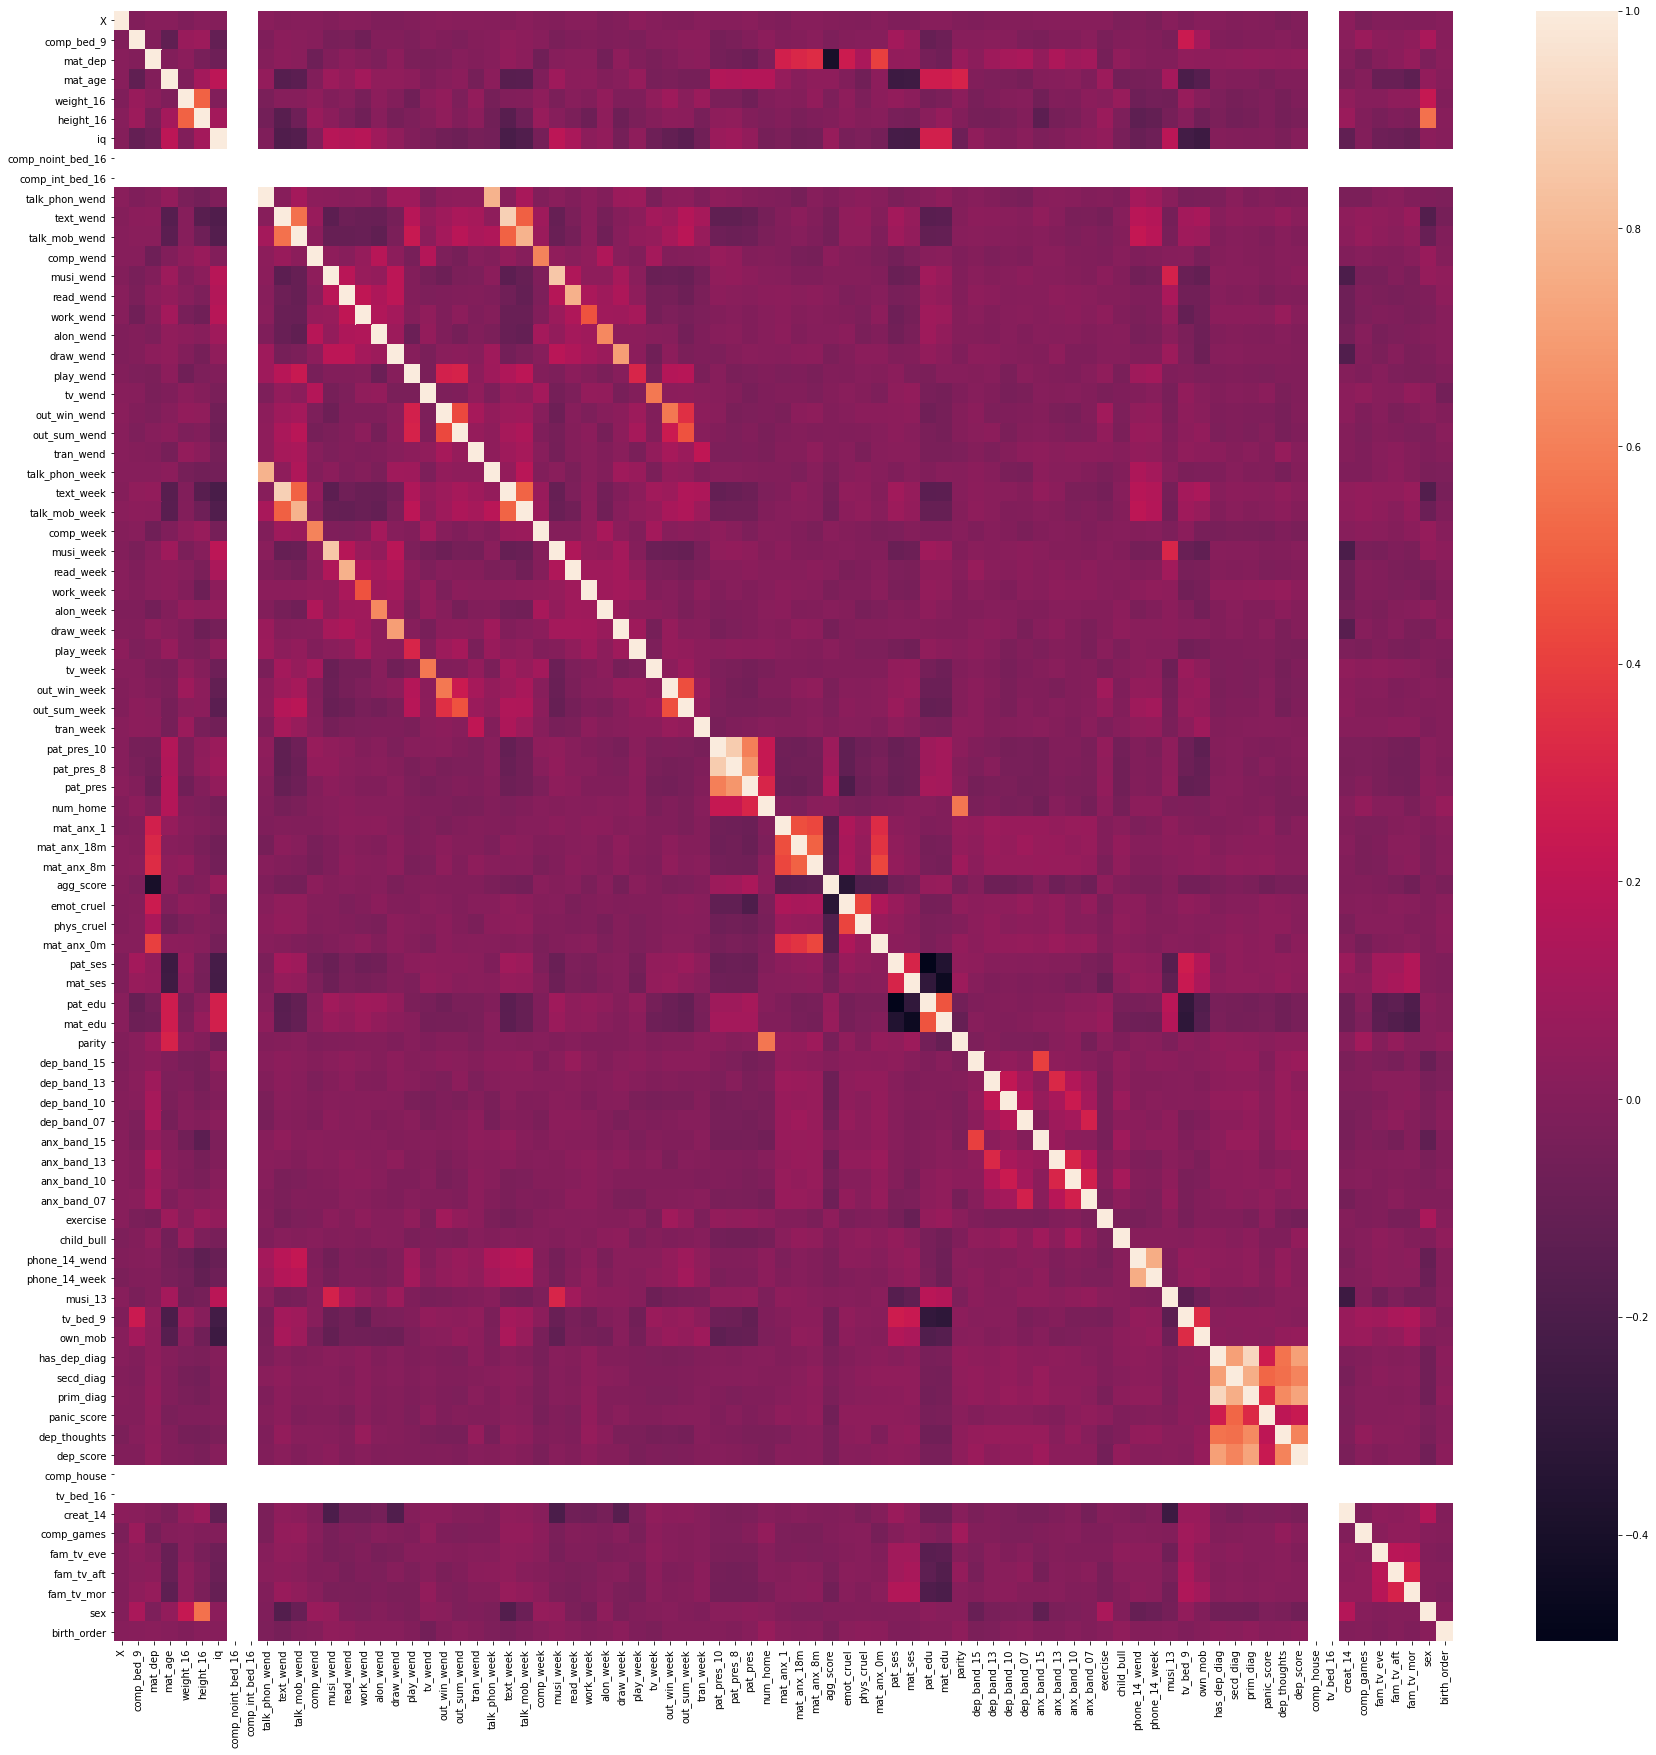

In [40]:
corr = data_frame.corr()
print(corr.shape)
fig, ax = plt.subplots(figsize=(30,30))
sns.heatmap(corr, xticklabels=True, yticklabels=True,ax=ax)

In [41]:
#data.describe()

#print(description_frame.columns)
#print(description_frame[ 'Variable Name' ].values)
i = 0;
for column in data_frame.columns:
    column_desc = description_frame.loc[description_frame['Variable Name'] == column];
    if ((~column_desc.empty)):
        if (is_numeric_dtype(data_frame[column].dtype) == False):
            #print(str(data_frame[column].dtype) + str(is_numeric_dtype(data_frame[column].dtype)))
            print(column + '(' + str(data_frame[column].dtype) +') :' + column_desc['Variable Description'].values)
            i=i+1
            
print(i)

[]
1


In [42]:
def get_detailed_correlations(data_frame):
    correlations = []
    discarded_correlations = 0
    for column_1_ in data_frame.columns:
        for column_2_ in data_frame.columns:
            if(column_1_ == column_2_ or column_1_<column_2_ ):
                discarded_correlations=discarded_correlations+1
                continue
            #if ((column_1_.endswith("wend") or column_1_.endswith("week")and(column_2_.endswith("wend") or column_2_.endswith("week")) and column_1_[:-4 or None] ==  column_2_[:-4 or None])):
               # discarded_correlations=discarded_correlations+1
              #  continue
            column_1 = data_frame[column_1_].to_numpy()
            column_2 = data_frame[column_2_].to_numpy()
 
            if(is_numeric_dtype(column_1.dtype) and is_numeric_dtype(column_2.dtype)):
                vals = (np.vstack((column_1, column_2))).T
                vals = (vals[~np.isnan(vals).any(axis=1)]).T
                if (len(vals[0]) == 0):
                    discarded_correlations=discarded_correlations+1
                    continue
                pearsons = stats.pearsonr(vals[0],vals[1])
                if (pearsons[0] == float('NaN')):
                    discarded_correlations=discarded_correlations+1
                    continue
                tup = tuple([column_1_,column_2_,pearsons[0],pearsons[1]])
                #print(tup)
                correlations.append(tup)
    return correlations
correlations_complex = get_detailed_correlations(data_frame)
correlations_complex = sorted(correlations_complex,reverse=True, key=lambda tup: (abs(tup[2])) )



C:\Users\FUCK SAKE\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [35]:
print(len(correlations_complex))

for item in correlations_complex:
    if (item[1] == 'dep_band_07' and item[0] == 'dep_band_10'):
        col1_desc = description_frame.loc[description_frame['Variable Name'] == item[0]]['Variable Description'].values
        col2_desc = description_frame.loc[description_frame['Variable Name'] == item[1]]['Variable Description'].values
        print(str(col1_desc) + ": " + str(col2_desc) + " = " + str(item[2]) + " prob: " + str(item[3]))
print("done")
for i in range(40):
    item = correlations_complex[i];
    col1_desc = description_frame.loc[description_frame['Variable Name'] == item[0]]['Variable Description'].values
    col2_desc = description_frame.loc[description_frame['Variable Name'] == item[1]]['Variable Description'].values
    print(str(col1_desc) + ": " + str(col2_desc) + " = " + str(item[2]) + " prob: " + str(item[3]))
    print( item[0]+ ": " +  item[1] + " = " + str(item[2]) + " prob: " + str(item[3]))

3403
['Child has depression (DAWBA band prediction)']: ['Child has depression (DAWBA band prediction)'] = 0.17108329524233856 prob: 3.3966249622550216e-43
done
["Mother's Edinburgh Postnatal Depression Scale (EPDS) score."]: ["Computer without internet access is more or less permanently in study child's room"] = nan prob: nan
mat_dep: comp_noint_bed_16 = nan prob: nan
["Mother's Edinburgh Postnatal Depression Scale (EPDS) score."]: ["Computer with internet access is more or less permanently study child's room"] = nan prob: nan
mat_dep: comp_int_bed_16 = nan prob: nan
["Mother's Edinburgh Postnatal Depression Scale (EPDS) score."]: ['Aggression score of partnership'] = -0.39937030196208806 prob: 0.0
mat_dep: agg_score = -0.39937030196208806 prob: 0.0
["Mother's Edinburgh Postnatal Depression Scale (EPDS) score."]: ["Mother experienced anxiety or 'nerves' since study child was born"] = 0.39902469388079753 prob: 0.0
mat_dep: mat_anx_0m = 0.39902469388079753 prob: 0.0
["Mother's Edinburgh 

In [32]:
for column_1_ in data_frame.columns:
    for column_2_ in data_frame.columns:
        if(column_1_ == column_2_ or column_1_<column_2_ ):

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(corr)



X  comp_bed_9   mat_dep   mat_age  weight_16  \
X                  1.000000   -0.007449  0.014914  0.013856  -0.013672   
comp_bed_9        -0.007449    1.000000 -0.004688 -0.128234   0.072421   
mat_dep            0.014914   -0.004688  1.000000 -0.005675   0.022857   
mat_age            0.013856   -0.128234 -0.005675  1.000000  -0.015973   
weight_16         -0.013672    0.072421  0.022857 -0.015973   1.000000   
height_16          0.005430    0.081868 -0.037471  0.107152   0.506162   
iq                 0.004083   -0.107550 -0.076213  0.196829  -0.010114   
comp_noint_bed_16       NaN         NaN       NaN       NaN        NaN   
comp_int_bed_16         NaN         NaN       NaN       NaN        NaN   
talk_phon_wend     0.018449   -0.018171  0.004546  0.056988  -0.033002   
text_wend          0.004708    0.024368  0.030367 -0.161208   0.006999   
talk_mob_wend      0.009815    0.020682  0.020107 -0.143944   0.009238   
comp_wend          0.005575    0.009315 -0.075301 -0.007283   0.036623   
musi_wend         -0.006511   -0.038845 -0.010083  0.082325  -0.011128   
read_wend          0.013564   -0.033163  0.023254  0.050868   0.012864   
work_wend          0.009868   -0.068577 -0.000486  0.105415  -0.036037   
alon_wend         -0.018054   -0.000919 -0.022368  0.041189   0.029975   
draw_wend         -0.013417   -0.005312  0.031539  0.044087  -0.003767   
play_wend         -0.004123   -0.023456 -0.029478  0.028761  -0.068860   
tv_wend            0.013454    0.005943 -0.031993 -0.012529   0.023146   
out_win_wend       0.018914   -0.008282 -0.022252  0.005157   0.047897   
out_sum_wend       0.013314   -0.021685  0.007532  0.024271  -0.019429   
tran_wend          0.014446    0.005027 -0.004177 -0.043382   0.056029   
talk_phon_week     0.009197    0.010410  0.008513  0.025492  -0.047561   
text_week          0.001851    0.040506  0.051872 -0.154819  -0.007008   
talk_mob_week      0.018902    0.033042  0.028034 -0.148925  -0.004504   
comp_week          0.000231    0.012628 -0.066523 -0.014176   0.036689   
musi_week         -0.006523   -0.031334  0.007276  0.087663  -0.026315   
read_week          0.011094   -0.016085  0.020845  0.024737   0.016496   
work_week          0.014483   -0.004577  0.018751  0.033005  -0.005531   
alon_week         -0.015073   -0.017052 -0.056805 -0.006414   0.048692   
draw_week         -0.001409   -0.009152  0.034943  0.016590  -0.017222   
play_week          0.032171   -0.022827 -0.011850  0.060014  -0.017833   
tv_week            0.008978    0.005238 -0.030967 -0.041087   0.045182   
out_win_week      -0.003440    0.016303 -0.011458 -0.027580   0.092166   
out_sum_week      -0.011140    0.032310  0.018775 -0.042190   0.021205   
tran_week          0.011548    0.029643  0.028479 -0.046390   0.078154   
pat_pres_10        0.010248   -0.047495 -0.049441  0.162425  -0.029770   
pat_pres_8         0.008329   -0.033080 -0.060627  0.151634  -0.025849   
pat_pres           0.020552   -0.004684 -0.085246  0.167564  -0.069250   
num_home          -0.006248    0.030440 -0.021464  0.165140  -0.006711   
mat_anx_1         -0.015453   -0.005937  0.277486  0.059933   0.007793   
mat_anx_18m        0.012726    0.001717  0.315201  0.013023   0.000838   
mat_anx_8m         0.014024    0.019144  0.335115  0.035223   0.050801   
agg_score         -0.000147   -0.020336 -0.399370  0.039236  -0.023589   
emot_cruel        -0.003248    0.004851  0.256078 -0.012419   0.034580   
phys_cruel        -0.007137    0.008528  0.132974 -0.060664  -0.022557   
mat_anx_0m         0.008687    0.009030  0.399025  0.029385   0.024662   
pat_ses           -0.017902    0.106321  0.048338 -0.257220   0.047628   
mat_ses           -0.017576    0.068137  0.053851 -0.251161   0.023159   
pat_edu            0.014482   -0.102490 -0.047205  0.260446  -0.042176   
mat_edu            0.015787   -0.080589 -0.065835  0.257194  -0.026861   
parity            -0.010709    0.013634  0.072405  0.294267   0.023191   
dep_band_15       -0.012701   

In [77]:

def calculate_pca(data):
    x = data
    min_max_scaler = pre.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    df = pd.DataFrame(x_scaled)
    pca = PCA()
    pca.fit(x_scaled)
    return pca
   
def test_pca_columns(cols):
    data = data_frame[cols].dropna() #returns a numpy array
    row_count =  len(data.index)
    print("Number_of_rows: " + str(row_count))
    if (row_count==0):
        print("Error, no rows!")
        return
    pca = calculate_pca(data.values)
    print(pca.explained_variance_ratio_)
    print(pca.components_)
    
test_pca_columns(["mat_dep","mat_anx_0m",'agg_score'])

Number_of_rows: 10517
[0.77755631 0.15172511 0.07071858]
[[ 0.18943998  0.97712627 -0.09662683]
 [ 0.58328335 -0.19115222 -0.78945637]
 [ 0.78986899 -0.09319377  0.60615336]]
